<a href="https://colab.research.google.com/github/steinjm21/ColabInClass/blob/main/matplotlibProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining function to be outputted to .csv

In [2]:
import numpy as np
import sys
import datetime
import math

In [3]:
def inside_circle(total_count):
    x = np.random.uniform(size=total_count)
    y = np.random.uniform(size=total_count)
    radii = np.sqrt(x*x + y*y)
    count = len(radii[np.where(radii<=1.0)])
    return count

I found using np.empty and np.vstack to be more efficient (it actually worked) with the code I had written and tried to painstakingly edit for hours.

In [4]:
if __name__ == '__main__':
    grid = np.empty((0, 4))

    # printing requested outputs
    n_samples = int(15000)
    start_time = datetime.datetime.now()
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples
    end_time = datetime.datetime.now()
    elapsed_time = (end_time - start_time).total_seconds()
    size_of_float = np.dtype(np.float64).itemsize
    memory_required = 3 * n_samples * size_of_float / (1024**3)
    print("# of Samples: {}, Pi: {}, memory: {} GiB, time: {} s".format(
          n_samples, my_pi, memory_required, elapsed_time))

    #for loop iterating over sample sizes of 100 to 15000 (larger ranges did not run)
    for n in range(100, 15001):
      n_samples = int(n)
      start_time = datetime.datetime.now()
      counts = inside_circle(n_samples)
      my_pi = 4.0 * counts / n_samples
      end_time = datetime.datetime.now()
      elapsed_time = (end_time - start_time).total_seconds()
      size_of_float = np.dtype(np.float64).itemsize
      memory_required = 3 * n_samples * size_of_float / (1024**3)
      abs_err = abs(my_pi - math.pi)
      rel_err = abs(abs_err / math.pi) / abs(math.pi)
      grid = np.vstack([grid, [n_samples, rel_err, memory_required, elapsed_time]])
    np.savetxt('matplotlibProject.csv', grid, delimiter=',')

# of Samples: 15000, Pi: 3.1477333333333335, memory: 0.00033527612686157227 GiB, time: 0.013949 s


.csv has been saved. Now time to call it back and assign variables to each column.

In [5]:
data = np.loadtxt(fname='matplotlibProject.csv',
delimiter=',')
n_val=data[ : , 0 ]
err_val=data[ : , 1]
mem_val=data[ : , 2]
time_val=data[ : , 3]

log-log for N vs. error

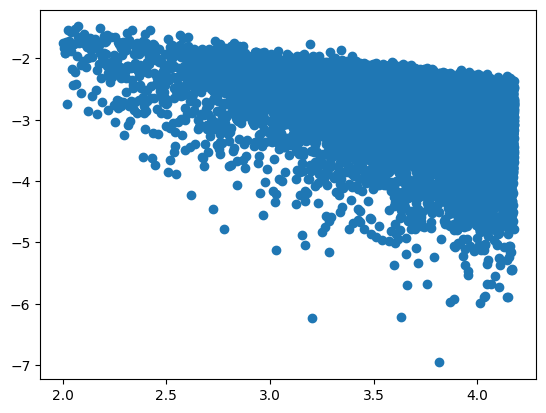

In [6]:
import matplotlib
log_n =[]
for n in range(len(n_val)):
 log_n.append(math.log(n_val[n],10))
log_err =[]
for err in err_val:
 log_err.append(math.log(err,10))
matplotlib.pyplot.scatter(log_n,log_err)

-0.5082330456158153 -1.0265182511712543


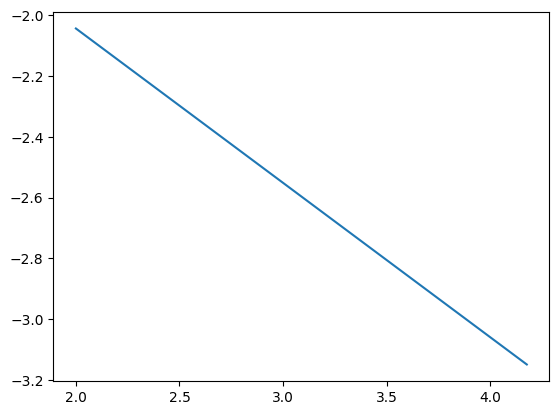

In [7]:
z = np.polyfit(log_n, log_err, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(log_n, p(log_n))
print(z[0],z[1])
# z[0] is the slope of the trendline
# z[1] is the y-intercept of the trendline

N vs. memory

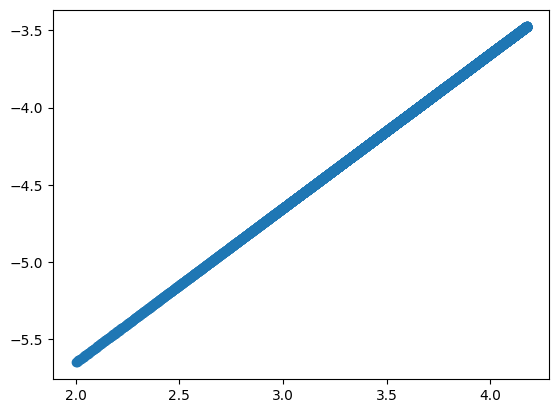

In [8]:
log_mem =[]
for mem in mem_val:
 log_mem.append(math.log(mem,10))
matplotlib.pyplot.scatter(log_n,log_mem)

1.0000000000000002 -7.6506886282078295


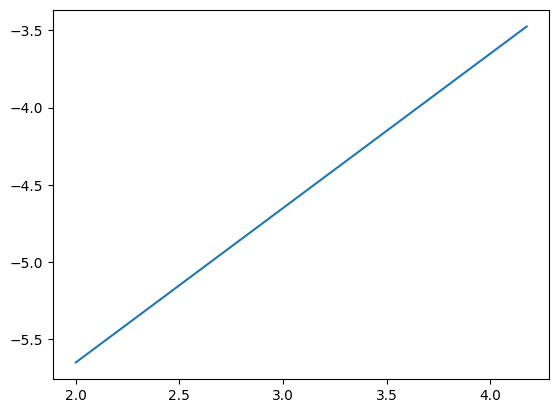

In [9]:
z = np.polyfit(log_n, log_mem, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(log_n, p(log_n))
print(z[0],z[1])

N vs. time

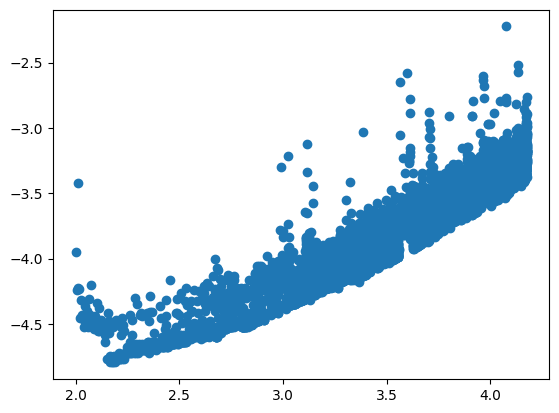

In [10]:
log_time =[]
for time in time_val:
 log_time.append(math.log(time,10))
matplotlib.pyplot.scatter(log_n,log_time)

0.832112987952658 -6.715996341801188


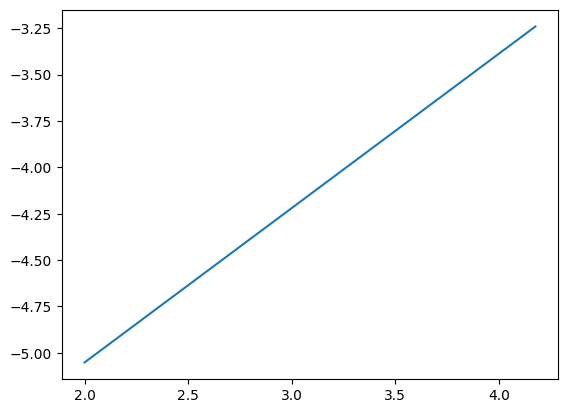

In [11]:
z = np.polyfit(log_n, log_time, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(log_n, p(log_n))
print(z[0],z[1])

# Questions:

1. According to my plot, as ***n*** increases, the points on the plot became more spread out, which I assume means the estimates of pi became less accurate. The slope of the line of best fit is approximately -0.5, so when ***n*** increases by 10, the error does not decrease by 10 as well.

2. The amount of memory required scales to increase *very* similarly to the increase in ***n***, as the slope of the line of best fit is very close to 1. I do expect that this relationship would be linear. One reason I believe this is because we transformed both our ***n*** data and our memory data into log base 10 using the same process, so if the proportion between the two is almost 1, then their starting values before the transformation should be nearly the same. Linearity also makes sense to me when I think about ***n*** number of tests requiring a similar amount of memory to store, so increasing ***n*** should proportionally increase the memory required.

3. According to my plot, as ***n*** increases, so does the amount of time needed to run the program. This is what I expected. I also expected the plot to look somewhat exponential, which it sort of does, but one could argue that it is linear because it barely curves.